<a href="https://colab.research.google.com/github/tingjhenjiang/python_ML_ntu_spring2019/blob/master/wk07_mnist_practice_basicNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_train = (x_train-x_train.min())/(x_train.max()-x_train.min())
x_test = x_test.reshape(10000, 784)
x_test = (x_test-x_test.min())/(x_test.max() - x_test.min())
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
model = Sequential()
model.add(Dense(10, input_dim=784))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='mse', optimizer=SGD(lr=0.087), metrics=['accuracy'])
model.summary()

In [ ]:
x_train.shape

In [ ]:
x_test.shape

In [ ]:
model.fit(x_train, y_train, batch_size=100, epochs=100)

# Keras in Tensorflow 2.0

In [1]:
import tensorflow as tf
import numpy as np
import numpy as np
import matplotlib.pyplot as plt


from tensorflow.keras import datasets #mnist
#from tensorflow.keras.utils import np_utils
from tensorflow.keras import models #Sequential
from tensorflow.keras import layers #Dense, Activation
from tensorflow.keras import optimizers #SGD

print(tf.__version__)
print(tf.keras.__version__)

2.3.0
2.4.0


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

def std_nparray(arr):
    arr = (arr-arr.min())/(arr.max()-arr.min())
    return(arr)

def convert_for_softmax_output(arr):
    return(tf.keras.utils.to_categorical(arr, num_classes=len(np.unique(arr)), dtype='float32'))

x_train = x_train.reshape(-1,784) #x_train.reshape(60000, 784)
x_train = std_nparray(x_train)
x_test = x_test.reshape(-1, 784)
x_test = std_nparray(x_test)
y_train=convert_for_softmax_output(y_train)  #也可以不轉換，但下面要用sparse_categorical_crossentropy
y_test=convert_for_softmax_output(y_test)
x_val = x_train[-10000:]
y_val = y_train[-10000:]

print(x_train.shape)
print(x_train.dtype)
print(y_train)
print(y_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 784)
float64
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
(60000, 10)


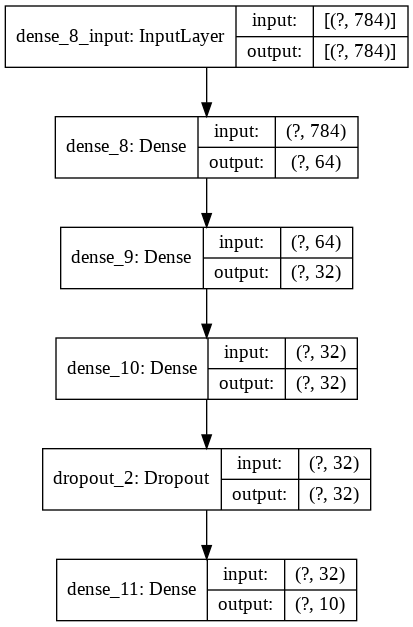

In [5]:
model = tf.keras.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(784,)))
model.add(layers.Dense(32,activation='relu',kernel_initializer=tf.keras.initializers.glorot_normal))
model.add(layers.Dense(32,activation='relu',kernel_initializer=tf.keras.initializers.glorot_normal))
model.add(layers.Dropout(.2))
model.add(layers.Dense(10,activation='softmax'))
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='CategoricalCrossentropy', #沒有to_categorical時可以用sparse_categorical_crossentropy
              metrics=['accuracy'],
              )
tf.keras.utils.plot_model(
    model, show_shapes=True, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96
)

In [6]:
history = model.fit(x_train, y_train, batch_size=256, epochs=100, validation_split=0.3, verbose=0, validation_data=(x_val, y_val))

In [7]:
history.history

{'accuracy': [0.7396904826164246,
  0.9052143096923828,
  0.9277856945991516,
  0.9404523968696594,
  0.9493571519851685,
  0.9555952548980713,
  0.9617142677307129,
  0.9661666750907898,
  0.9679523706436157,
  0.9701666831970215,
  0.9743333458900452,
  0.9745237827301025,
  0.9782381057739258,
  0.9785952568054199,
  0.9806666374206543,
  0.9817857146263123,
  0.9826904535293579,
  0.9838809370994568,
  0.9845714569091797,
  0.9856666922569275,
  0.9858571290969849,
  0.9866190552711487,
  0.9859047532081604,
  0.9873095154762268,
  0.9896666407585144,
  0.9894523620605469,
  0.9902142882347107,
  0.991357147693634,
  0.9910714030265808,
  0.9914523959159851,
  0.991523802280426,
  0.9903095364570618,
  0.993071436882019,
  0.9908571243286133,
  0.9933333396911621,
  0.99314284324646,
  0.9921190738677979,
  0.993238091468811,
  0.9943095445632935,
  0.9944999814033508,
  0.9942380785942078,
  0.9948809742927551,
  0.9940000176429749,
  0.9950000047683716,
  0.9949047565460205,
  0.

In [8]:
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)
print("Generate predictions for 3 samples")
predictions = model.predict(x_test[:3])
print("predictions shape:", predictions.shape)
#no dropout test loss, test acc: [0.13936419785022736, 0.9725000262260437]

Evaluate on test data
79/79 [==============================] - 0s 3ms/step - loss: 0.2565 - accuracy: 0.9692
test loss, test acc: [0.2565285265445709, 0.9692000150680542]
Generate predictions for 3 samples
predictions shape: (3, 10)


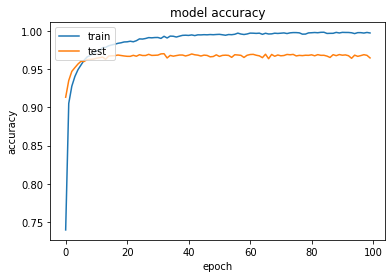

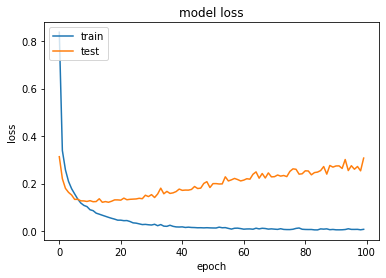

In [9]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()